**TRABAJO PRACTICO 3**

*Clasificacion del  consumo de energia por año*  

**Objetivo:** la idea principal radicaba  en la existencia  de un modelo de prediccion del consumo de  energia, esto a fin que se pueda establecer un mejor planeamiento en cuanto a gastos de  insfraestructura, no solo eso sino tambien en cuanto es  Imaginando que estamos a medioados de 2020, predecir en qué horas el precio de la electricidad en
el Mercado Diario será elevado, siendo la clase 0 para valores menores a 40 €, y clase 1 para valores
mayores a 40 €. Se utilizará el contexto y datos históricos del 2020 de la variable target que queremos
clasificar y de otros atributos (features) que pueden ayudar a predecir modelo

**Objetivos:**<br>
1) Seleccionar los datos a modelar. Justificar esa selección.<br>
2) Entrenar al menos tres modelos de clasificación distintos sobre estos datos.<br>
3) Evaluar la performance de los modelos y comparar ventajas y desventajas de cada
uno.<br>
4) Determinar la importancia de las features incluidas en la predicción. Interpretar.<br>


In [20]:
# Pandas y numpy para manipulación
import pandas as pd
import numpy as np
import glob as glob
import seaborn as sn
import os as os
# Librerias para gráficos 
import seaborn as sns
import matplotlib.pyplot as plt
# Herramientas de modelado
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score


**Sobre este directorio**<br>

Cada archivo es de un administrador de red de un año específico.

Las columnas de cada archivo son:<br>

**● net_manager:**      código del administrador de la red regional<br>
**● purchase_area:**    código del área donde se compra la energía<br>
**● street:**           Nombre de la calle<br>
**● zipcode_fromy zipcode_to:** 2 columnas para el rango de códigos postales cubiertos, 4 números y 2 letras<br>
**● city:**             Nombre de la ciudad<br>
**● num_connections:**  Número de conexiones en el rango de códigos postales<br>
**● delivery_perc:**    porcentaje del consumo neto de electricidad o gas. Cuanto más bajo, más energía se devolvió a la red (por ejemplo, si tiene paneles solares)<br>
**● perc_of_active_connections:**   Porcentaje de conexiones activas en el rango de código postal<br>
**● type_of_connection:**           principal tipo de conexión en el rango de código postal. Para la electricidad son # fusibles X # amperios. Para gas es G4, G6, G10, G16, G25<br>
**● type_conn_perc:**   porcentaje de presencia del tipo principal de conexión en el rango del código postal<br>
**● annual_consume:**   Consumo anual. Kwh para electricidad, m3 para gas<br>
**● annual_consume_lowtarif_perc:** Porcentaje de consumo en horario de tarifa baja. De 22:00 a 07:00 y los fines de semana.<br>
**● smartmeter_perc:**  porcentaje de smartmeters en los rangos de código postal<br>

In [40]:
# merging the files

data1 = pd.read_csv('./dataset/Electricity/enexis_electricity/enexis_electricity_01012010.csv', encoding='latin1',  sep=",")
data2 = pd.read_csv('./dataset/Electricity/enexis_electricity/enexis_electricity_01012011.csv', encoding='latin1',  sep=",")
data3 = pd.read_csv('./dataset/Electricity/enexis_electricity/enexis_electricity_01012012.csv', encoding='latin1', sep=",")
data4 = pd.read_csv('./dataset/Electricity/enexis_electricity/enexis_electricity_01012013.csv', encoding='latin1',  sep=",")
data5 = pd.read_csv('./dataset/Electricity/enexis_electricity/enexis_electricity_01012014.csv', encoding='latin1', sep=",")
data6 = pd.read_csv('./dataset/Electricity/enexis_electricity/enexis_electricity_01012015.csv', encoding='latin1',  sep=",")
data7 = pd.read_csv('./dataset/Electricity/enexis_electricity/enexis_electricity_01012016.csv', encoding='latin1',  sep=",")
data8 = pd.read_csv('./dataset/Electricity/enexis_electricity/enexis_electricity_01012017.csv', encoding='latin1',  sep=",")
data9 = pd.read_csv('./dataset/Electricity/enexis_electricity/enexis_electricity_01012018.csv', encoding='latin1',  sep=",")
data10 = pd.read_csv('./dataset/Electricity/enexis_electricity/enexis_electricity_01012019.csv', encoding='latin1',  sep=",")
data11 = pd.read_csv('./dataset/Electricity/enexis_electricity/enexis_electricity_01012020.csv', encoding='latin1', sep=",")

In [41]:
#crear el dataframe con la columna del anio con su respectivo anio 
def pasar_anio(anio,data):
    data_anio=pd.DataFrame({'anio':[2010]})
    df1=pd.concat([data,data_anio],axis=1)
    data['anio'] = df1.apply(lambda x: anio if np.isnan(x['anio']) else x['anio'], axis=1)
    return data

In [42]:
#colocamos el anio del dataset con su respectivo anio
data1=pasar_anio(2010,data1)
data2=pasar_anio(2011,data2)
data3=pasar_anio(2012,data3)
data4=pasar_anio(2013,data4)
data5=pasar_anio(2014,data5)
data6=pasar_anio(2015,data6)
data7=pasar_anio(2016,data7)
data8=pasar_anio(2017,data8)
data9=pasar_anio(2018,data9)
data10=pasar_anio(2019,data10)
data11=pasar_anio(2020,data11)

In [43]:
columnas=['delivery_perc', 'num_connections',
       'perc_of_active_connections', 'type_conn_perc','annual_consume', 'annual_consume_lowtarif_perc', 'smartmeter_perc',
       'anio']
data1[columnas] = data1[columnas].astype(np.float)
data2[columnas] = data2[columnas].astype(np.float)
data3[columnas] = data3[columnas].astype(np.float)
data4[columnas] = data4[columnas].astype(np.float)
data5[columnas] = data5[columnas].astype(np.float)
data6[columnas] = data6[columnas].astype(np.float)
data7[columnas] = data7[columnas].astype(np.float)
data8[columnas] = data8[columnas].astype(np.float)
data9[columnas] = data9[columnas].astype(np.float)
data10[columnas] = data10[columnas].astype(np.float)
data11[columnas] = data11[columnas].astype(np.float)

Juntamos  todos los datos de todos los años

In [44]:
df = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11], ignore_index=True)
df.head()
df.shape

(1266279, 15)

In [45]:
data11.shape

(124877, 15)

In [46]:
df.sample(5)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,anio
1010434,Enexis B.V.,ENEXIS,Madame Curiestraat,9728HT,9728HT,GRONINGEN,95.00,20.0,100.0,45.00,1x25,2309.35,45.45,80.0,2018.0
152543,Enexis B.V.,ENEXIS,Koehoornstraat,5935ST,5935ST,STEYL,100.00,18.0,100.0,78.00,1X35,2009.00,21.00,0.0,2011.0
862655,Enexis B.V.,ENEXIS,Papaverstraat,7741ST,7741SX,COEVORDEN,82.00,34.0,100.0,76.00,1X35,2783.00,47.00,94.0,2017.0
1036083,Enexis B.V.,ENEXIS,Putterpad,5076SP,5076SP,HAAREN,91.67,24.0,100.0,58.33,3x25,2923.17,19.74,37.5,2019.0
1155636,Enexis B.V.,ENEXIS,Bartokstraat,5011JA,5011JA,TILBURG,100.00,23.0,100.0,60.87,1x35,2784.26,51.53,91.3,2020.0


Analisis exploratorio

In [47]:
data_desc = pd.DataFrame(round(df.isnull().sum() /df.shape[0],2), columns= ['Porcentaje de nulos'])
data_desc['type'] = df.dtypes
data_desc = data_desc[['type','Porcentaje de nulos']]
data_desc['Nulos'] = df.isnull().sum()
values= []
example=[]
for x in df:
    values.append(len(df[x].unique()))
    example.append(df[x].unique())
data_desc['Valores distintos'] = values
data_desc['Ejemplos'] = example

data_desc

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
net_manager,object,0.00,0,2,"[Enexis B.V., Enexis]"
purchase_area,object,0.00,0,1,[ENEXIS]
street,object,0.00,0,52208,"[Sasdijk, Nieuweweg, Koppenhof, Plein, Zevenhu..."
zipcode_from,object,0.00,0,131315,"[4251AB, 4251AC, 4251AD, 4251AE, 4251AH, 4251A..."
zipcode_to,object,0.00,0,129995,"[4251AB, 4251AC, 4251AD, 4251AG, 4251AH, 4251A..."
city,object,0.00,0,1104,"[WERKENDAM, SLEEUWIJK, NIEUWENDIJK NB, WIJK EN..."
delivery_perc,float64,0.00,582,1538,"[100.0, 95.0, 92.0, 96.0, 94.0, 97.0, 88.0, 91..."
num_connections,float64,0.00,0,300,"[16.0, 11.0, 30.0, 21.0, 12.0, 26.0, 24.0, 32...."
perc_of_active_connections,float64,0.00,0,1,[100.0]
type_conn_perc,float64,0.08,107512,2062,"[nan, 50.0, 64.0, 43.0, 52.0, 33.0, 46.0, 67.0..."


In [48]:
# Evaluamos el porcentaje de datos nulos por columna
def describe_data(cols: list, data: pd.DataFrame) -> pd.DataFrame:
    
    diccionario = {
        'Null': data.shape[0] - data.count(), 
        '% Null': round((data.shape[0] - data.count()) / data.shape[0] * 100, 3),
        'Types': data.dtypes
    }    
    return pd.DataFrame(index=cols, data=diccionario)



In [49]:
df.describe(include='all')

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,anio
count,1266279,1266279,1266279,1266279,1266279,1266279,1.265697e+06,1.266279e+06,1266279.0,1.158767e+06,1158698,1.266279e+06,1.266279e+06,1.266279e+06,1.266279e+06
unique,2,1,52208,131315,129995,1104,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN
top,Enexis B.V.,ENEXIS,Kerkstraat,9721ME,9721ME,GRONINGEN,NaN,NaN,NaN,NaN,1X35,NaN,NaN,NaN,NaN
freq,1088239,1266279,4524,11,11,49557,NaN,NaN,NaN,NaN,271125,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,9.486569e+01,2.177472e+01,100.0,6.930794e+01,NaN,4.681730e+03,3.776681e+01,2.832448e+01,2.015155e+03
std,NaN,NaN,NaN,NaN,NaN,NaN,1.037722e+01,1.226417e+01,0.0,1.935938e+01,NaN,3.668149e+03,1.607585e+01,3.493680e+01,3.173248e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+01,100.0,0.000000e+00,NaN,5.300000e+01,0.000000e+00,0.000000e+00,2.010000e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,9.333000e+01,1.500000e+01,100.0,5.333000e+01,NaN,2.891000e+03,2.600000e+01,0.000000e+00,2.012000e+03
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+02,1.900000e+01,100.0,6.842000e+01,NaN,3.640000e+03,4.100000e+01,1.000000e+01,2.015000e+03
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+02,2.500000e+01,100.0,8.600000e+01,NaN,4.874000e+03,4.961000e+01,5.400000e+01,2.018000e+03


Seleccion  de columnas 

Como es muy insignificante la cantidad de NaN  se eliminan esas filas

In [50]:
dataframe_limpio = df.dropna()
print(df.shape)
print(dataframe_limpio.shape)
describe_data(dataframe_limpio.columns,dataframe_limpio)


(1266279, 15)
(1158116, 15)


,Null,% Null,Types
net_manager,0,0.0,object
purchase_area,0,0.0,object
street,0,0.0,object
zipcode_from,0,0.0,object
zipcode_to,0,0.0,object
city,0,0.0,object
delivery_perc,0,0.0,float64
num_connections,0,0.0,float64
perc_of_active_connections,0,0.0,float64
type_conn_perc,0,0.0,float64


In [51]:
dataframe_limpio.describe(include='all')

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,anio
count,1158116,1158116,1158116,1158116,1158116,1158116,1.158116e+06,1.158116e+06,1158116.0,1.158116e+06,1158116,1.158116e+06,1.158116e+06,1.158116e+06,1.158116e+06
unique,2,1,52189,131211,129985,1104,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN
top,Enexis B.V.,ENEXIS,Kerkstraat,9721ME,9721ME,GRONINGEN,NaN,NaN,NaN,NaN,1X35,NaN,NaN,NaN,NaN
freq,980076,1158116,4128,10,10,45219,NaN,NaN,NaN,NaN,271125,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,9.439338e+01,2.180184e+01,100.0,6.930059e+01,NaN,4.661141e+03,3.801709e+01,3.089351e+01,2.015632e+03
std,NaN,NaN,NaN,NaN,NaN,NaN,1.072412e+01,1.232850e+01,0.0,1.935496e+01,NaN,3.674030e+03,1.587743e+01,3.536673e+01,2.882520e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+01,100.0,0.000000e+00,NaN,5.300000e+01,0.000000e+00,0.000000e+00,2.010000e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,9.286000e+01,1.500000e+01,100.0,5.333000e+01,NaN,2.872880e+03,2.700000e+01,0.000000e+00,2.013000e+03
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+02,1.900000e+01,100.0,6.842000e+01,NaN,3.612585e+03,4.152000e+01,1.300000e+01,2.016000e+03
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+02,2.500000e+01,100.0,8.600000e+01,NaN,4.841000e+03,4.993000e+01,6.500000e+01,2.018000e+03


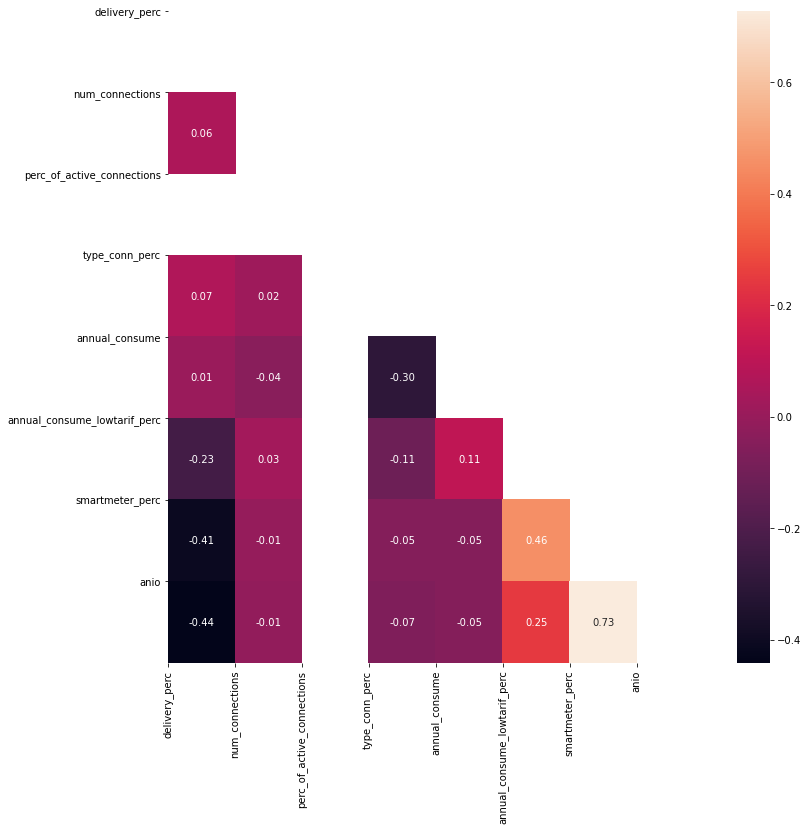

In [52]:
#calculamos el coeficiente de correlacion 
correlacion=  dataframe_limpio.corr(method='pearson')

#Sacamos la mitad que se repite
mask=np.zeros_like(correlacion, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f, ax= plt.subplots(figsize=(12,12))
#Generamos el heatmap
sns.heatmap(correlacion,annot=True, fmt='.2f', mask=mask)
#x
plt.xticks(range(len(correlacion.columns)),correlacion.columns)
#y
plt.yticks(range(len(correlacion.columns)), correlacion.columns)
#plot
plt.show()

In [ ]:
#dataframe_limpio_group_b_typ_conex_2 = dataframe_limpio.loc([:,['city':'WERKENDAM']])
#dataframe_limpio_group_b_typ_conex_2.head()

TypeError: cannot do slice indexing on Int64Index with these indexers [city] of type str

In [5]:
dataframe_limpio_group_b_typ_conex = dataframe_limpio.groupby("city").size().reset_index(name="Total")
dataframe_limpio_group_b_typ_conex


NameError: name 'dataframe_limpio' is not defined

In [ ]:
msno.bar(dataframe_limpio)

NameError: name 'msno' is not defined

ValueError: 'explode' must be of length 'x'

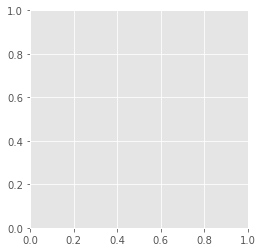

In [ ]:
count=dataframe_limpio["city"].value_counts().tolist()

label=dataframe_limpio["city"].value_counts().index


plt.style.use('ggplot')

dic = dict(zip(label,count))

import itertools
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'Others' if (dic[k]<2500) else k):
     newdic[key] = sum([dic[i] for i in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.2f%%',wedgeprops={"edgecolor":"k"},explode=[0,0,0,0,0,0], startangle=90)
ax.axis('equal')
plt.tight_layout()

plt.show()

In [ ]:
#dataframe_limpio_group_b_typ_conex_2 = dataframe_limpio.groupby(['type_of_connection','anio'])['price_usd_per_m2'].mean()
dataframe_limpio.type_of_connection.value_counts()

1X35    271125
3X25    201931
1x35    191862
1X25    170236
3x25    164781
1x25     99658
1X40     25233
1x40     23850
1X20      4048
1x20      1577
3X35       888
3x35       675
3x80       517
3X80       303
3X63       284
3x63       275
3X50       224
3x40       224
3X40       223
3x50       202
Name: type_of_connection, dtype: int64

La  idea es poder filtrar por los cuartiles que representen al menos el %90 de las filas para graficar nuevamente las correlaciones

In [ ]:
dataframe_limpio_group_b_typ_conex = dataframe_limpio.groupby("type_of_connection").size().reset_index(name="Total")
dataframe_limpio_group_b_typ_conex

,type_of_connection,Total
0,1X20,4048
1,1X25,170236
2,1X35,271125
3,1X40,25233
4,1x20,1577
5,1x25,99658
6,1x35,191862
7,1x40,23850
8,3X25,201931
9,3X35,888


In [ ]:
data_por_state = dataframe_limpio["type_of_connection"]

proportions = 100. * data_por_state.value_counts() / len(data_por_state)
proportions

1X35    23.410867
3X25    17.436164
1x35    16.566734
1X25    14.699391
3x25    14.228367
1x25     8.605183
1X40     2.178797
1x40     2.059379
1X20     0.349533
1x20     0.136169
3X35     0.076676
3x35     0.058284
3x80     0.044641
3X80     0.026163
3X63     0.024523
3x63     0.023745
3X50     0.019342
3x40     0.019342
3X40     0.019255
3x50     0.017442
Name: type_of_connection, dtype: float64

sacamos los cuartiles

In [ ]:
def get_iqr_values(datafr_indx, colmn_name):
    median = datafr_indx[colmn_name].median()
    q1 = datafr_indx[colmn_name].quantile(0.25) # 1st quartile
    q3 = datafr_indx[colmn_name].quantile(0.75) # 3rd quartile
    iqr = (q3-q1)*1.5 #Interquantile range
    minimum  = q1-iqr # The minimum value or the |- marker in the box plot
    maximum = q3+iqr # The maximum value or the -| marker in the box plot
    print("- Valor minimo:", minimum)
    print("- Valor maximo:", maximum)

In [ ]:
#Se obtienen los valores maximos y minimos de cada propiedad
print("Valores de tipo de propiedad PH:")
get_iqr_values(dataframe_limpio_group_b_typ_conex, 'surface_total_in_m2')
print("----------------------------------")
print("Valores de tipo de propiedad Apartm:")
get_iqr_values(data_apartm, 'surface_total_in_m2')
print("----------------------------------")
print("Valores de tipo de propiedad House:")
get_iqr_values(data_house, 'surface_total_in_m2')
print("----------------------------------")
print("Valores de tipo de propiedad Store:")
get_iqr_values(data_store, 'surface_total_in_m2')
